# REGRESIÓN LINEAL MÚLTIPLE

## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos de `stackloss`. Estos datos están ya disponibles en la librería **statsmodels**.

In [2]:
stackloss = sm.datasets.get_rdataset("stackloss", "datasets").data
stackloss.head(5)

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


Se analiza las correlaciones entre las diferentes variables: 

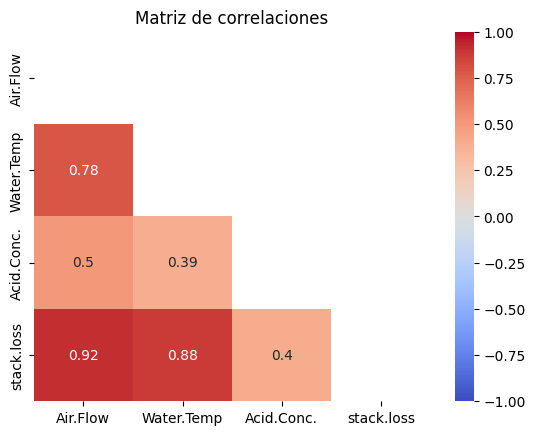

In [3]:
#Matriz de correlaciones 
matriz_cor=stackloss.corr('pearson')  #correlación de pearson

#como cor(x,x)=1 y cor(x,y)=cor(y,x) se puede disponer solo de la diagonal inferior. 
#La siguiente función elimina la parte superior de la matriz de correlaciones
mask = np.zeros(matriz_cor.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(matriz_cor, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', mask=mask) 
#cmap para elegir la gama de colores y vmin y vmax identificar todo el espectro de valores de la correlación de pearson [-1,1]
plt.title('Matriz de correlaciones')
plt.show()

Como puede verse hay varias variables con alta correlación. A continuación se definen las variables:
- Target: "stack.loss"
- Exógenas: resto

In [8]:
target = stackloss['stack.loss']  #dependiente
X = stackloss.drop(['stack.loss'], axis=1)  # independientes

Como puede verse, el objeto `target` es una serie y el objeto `X` es un dataframe con las variables explicativas del modelo.

## Modelo de Regresión Lineal Múltiple

In [9]:
# Modelo de regresión lineal múltiple 
X = sm.add_constant(X) # se añade la constante
rgl = sm.OLS(target, X).fit()  #ajuste del modelo
rgl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             stack.loss   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     59.90
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.02e-09
Time:                        11:31:43   Log-Likelihood:                -52.288
No. Observations:                  21   AIC:                             112.6
Df Residuals:                      17   BIC:                             116.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.9197     11.896     -3.356      0.004     -65.018     -14.821
Air.Flow       0.7156      0.135      5.307      0.000       0.431       1.000
Water.Temp     1.2953      0.368      3.520      0.003       0.519       2.072
Acid.Conc.    -0.1521      0.156     -0.973      0.344      -0.482       0.178
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.140
Skew:                          -0.193   Prob(JB):                        0.932
Kurtosis:                       3.107   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir del modelo podemos analizar los posibles outliers.

### Medidas de outliers e influencia de la regresión lineal por mínimos cuadrados

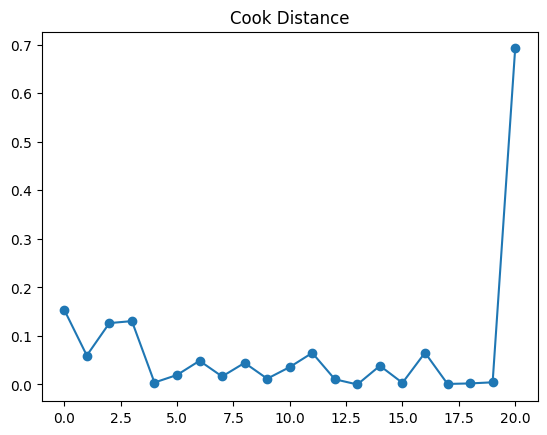

In [10]:
infl=rgl.get_influence()
sm_fr=infl.summary_frame()
plt.plot(sm_fr['cooks_d'], marker='o')
plt.title('Cook Distance')
plt.show()

Se observa que la última observación es un "potencial" outlier (aunque el valor de la distancia de Cook es inferior a 1)

## Modelo de Regresión Robusta - Estimador de Huber

In [11]:
huber=sm.RLM(target, X, M=sm.robust.norms.HuberT()).fit()
huber.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             stack.loss   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 29 Nov 2023                                         
Time:                        11:33:39                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0265      9.792     -4.190      0.000     -60.218     -21.835
Air.Flow       0.8294      0.111      7.472      0.000       0.612       1.047
Water.Temp     0.9261      0.303      3.057      0.002       0.332       1.520
Acid.Conc.    -0.1278      0.129     -0.994      0.320      -0.380       0.124
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Modelo de Regresión Robusta - Estimador de Bisquare

In [13]:
bisquare=sm.RLM(target, X, M=sm.robust.norms.TukeyBiweight()).fit()
bisquare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             stack.loss   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 29 Nov 2023                                         
Time:                        11:34:53                                         
No. Iterations:                    22                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.2854      9.504     -4.449      0.000     -60.914     -23.657
Air.Flow       0.9276      0.108      8.609      0.000       0.716       1.139
Water.Temp     0.6507      0.294      2.213      0.027       0.074       1.227
Acid.Conc.    -0.1123      0.125     -0.900      0.368      -0.357       0.132
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Comparativa de los resultados

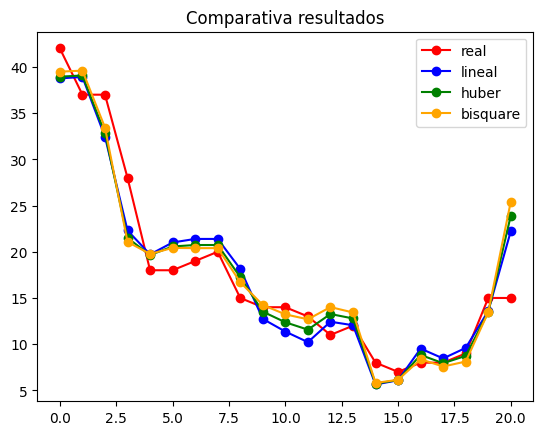

In [14]:
#Datos reales vs ajustados
fig=plt.subplots()
plt.plot(target, color='red', label='real', marker='o'), plt.legend(loc='upper right')
plt.plot(rgl.fittedvalues,color='blue', label='lineal', marker='o'), plt.legend(loc='upper right')
plt.plot(huber.fittedvalues,color='green', label='huber', marker='o'), plt.legend(loc='upper right')
plt.plot(bisquare.fittedvalues,color='orange', label='bisquare', marker='o'), plt.legend(loc='upper right')
plt.title('Comparativa resultados')
plt.show() 
#El valor error estandar residual disminuye al estimar una regresión robusta -> mejora resultado

In [16]:
#Valores de Residual standard error
print(f'RSE - Lineal: {round(np.sqrt(rgl.scale), 3)}')
print(f'RSE - Huber: {round(huber.scale, 3)}')
print(f'RSE - Bisquare: {round(bisquare.scale, 3)}')

RSE - Lineal: 3.243
RSE - Huber: 2.441
RSE - Bisquare: 2.282
